In [83]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [84]:
data = pd.read_csv('train.csv')
data.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,"Cauvery Colony,Koramangala",21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2,E,2,6,12,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2,40000
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,09-10-2017 12:48,12.929557,77.672280,ANYONE,0,1,0,...,2,NE,2,3,4,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2,22000
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12-06-2018 22:02,12.982870,80.262012,FAMILY,0,1,0,...,3,E,3,1,5,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3,28000
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1,E,1,1,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0,8000
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3,E,4,0,0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1,45000


In [85]:
data.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [86]:
type(data)

pandas.core.frame.DataFrame

In [87]:
data.shape

(20500, 25)

In [88]:
data.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20500 non-null  object 
 1   type             20500 non-null  object 
 2   locality         20500 non-null  object 
 3   activation_date  20500 non-null  object 
 4   latitude         20500 non-null  float64
 5   longitude        20500 non-null  float64
 6   lease_type       20500 non-null  object 
 7   gym              20500 non-null  int64  
 8   lift             20500 non-null  int64  
 9   swimming_pool    20500 non-null  int64  
 10  negotiable       20500 non-null  int64  
 11  furnishing       20500 non-null  object 
 12  parking          20500 non-null  object 
 13  property_size    20500 non-null  int64  
 14  property_age     20500 non-null  int64  
 15  bathroom         20500 non-null  int64  
 16  facing           20500 non-null  object 
 17  cup_board   

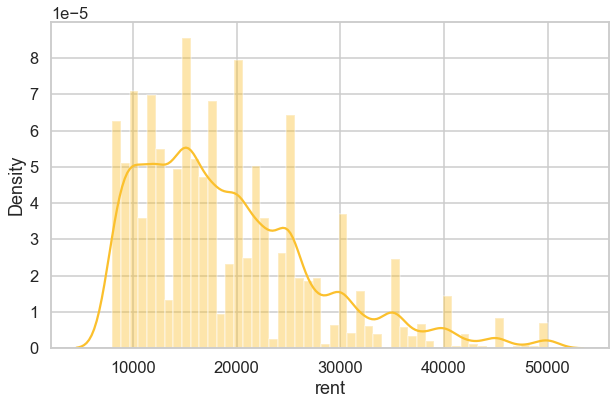

In [90]:
plt.figure(figsize=(10, 6))
sns.distplot(data['rent'], bins=50, hist=True, kde=True, color='#fbc02d')
plt.show()

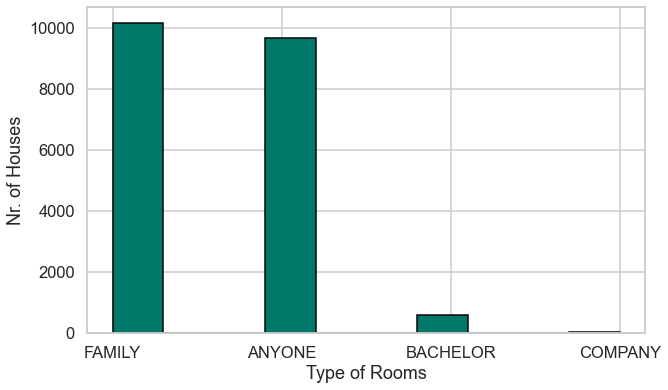

In [91]:
plt.figure(figsize=(10, 6))
plt.hist(data['lease_type'], ec='black', color='#00796b')
plt.xlabel('Type of Rooms')
plt.ylabel('Nr. of Houses')
plt.show()

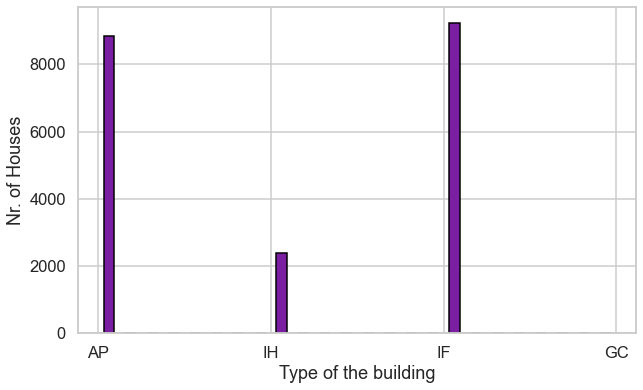

In [92]:
plt.figure(figsize=(10, 6))
plt.hist(data['building_type'], bins=24, ec='black', color='#7b1fa2', rwidth=0.5)
plt.xlabel('Type of the building')
plt.ylabel('Nr. of Houses')
plt.show()

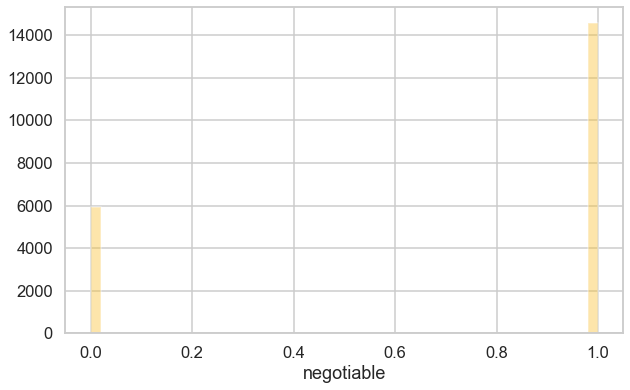

In [93]:
plt.figure(figsize=(10, 6))
sns.distplot(data['negotiable'], bins=50, hist=True, kde=False, color='#fbc02d')
plt.show()

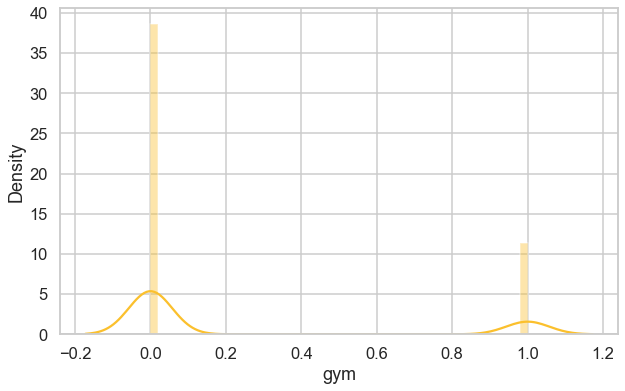

In [94]:
plt.figure(figsize=(10, 6))
sns.distplot(data['gym'], bins=50, hist=True, kde=True, color='#fbc02d')
plt.show()

<AxesSubplot:title={'center':'Houses having gym'}, ylabel='rent'>

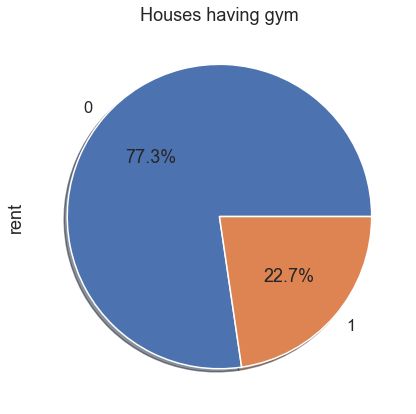

In [95]:
data.groupby('gym')["rent"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(7,7),title="Houses having gym")

In [96]:
data['gym'].value_counts()

0    15852
1     4648
Name: gym, dtype: int64

<AxesSubplot:title={'center':'Houses having lift or not'}, ylabel='rent'>

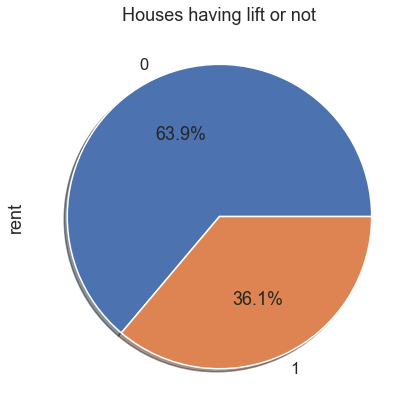

In [97]:
data.groupby('lift')["rent"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(7,7),title="Houses having lift or not")

In [98]:
data['lift'].value_counts()

0    13090
1     7410
Name: lift, dtype: int64

<AxesSubplot:title={'center':'Houses having a swimming pool or not'}, ylabel='rent'>

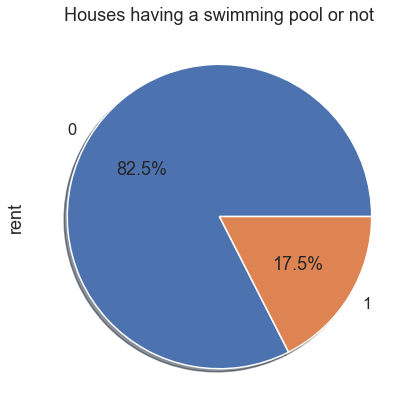

In [99]:
data.groupby('swimming_pool')["rent"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(7,7),title="Houses having a swimming pool or not")

In [100]:
data['swimming_pool'].value_counts()

0    16914
1     3586
Name: swimming_pool, dtype: int64

<AxesSubplot:title={'center':'Houses having furniture or not'}, ylabel='rent'>

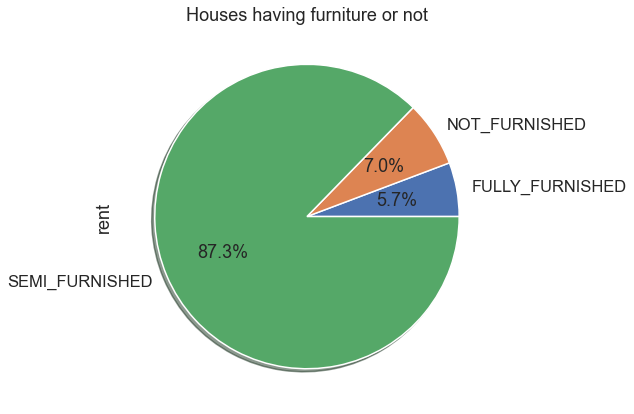

In [101]:
data.groupby('furnishing')["rent"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(7,7),title="Houses having furniture or not")

In [102]:
data['furnishing'].value_counts()

SEMI_FURNISHED     17895
NOT_FURNISHED       1429
FULLY_FURNISHED     1176
Name: furnishing, dtype: int64

<AxesSubplot:title={'center':'Houses are negotiable or not'}, ylabel='rent'>

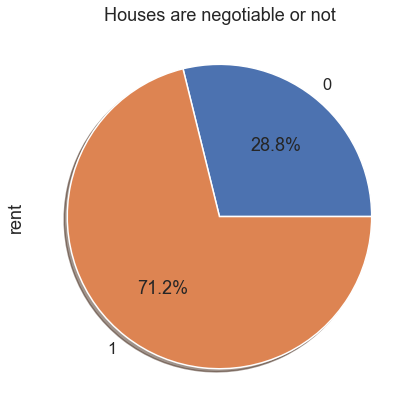

In [103]:
data.groupby('negotiable')["rent"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(7,7),title="Houses are negotiable or not")

In [104]:
data['negotiable'].value_counts()

1    14586
0     5914
Name: negotiable, dtype: int64

<AxesSubplot:title={'center':'Houses having parking or not'}, ylabel='rent'>

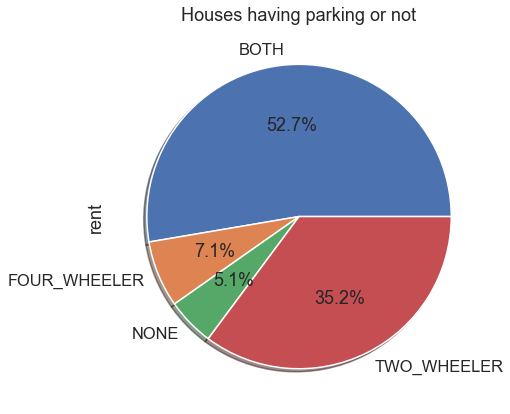

In [105]:
data.groupby('parking')["rent"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(7,7),title="Houses having parking or not")

In [106]:
data['parking'].value_counts()

BOTH            10799
TWO_WHEELER      7211
FOUR_WHEELER     1448
NONE             1042
Name: parking, dtype: int64

<AxesSubplot:title={'center':'Facing of houses'}, ylabel='rent'>

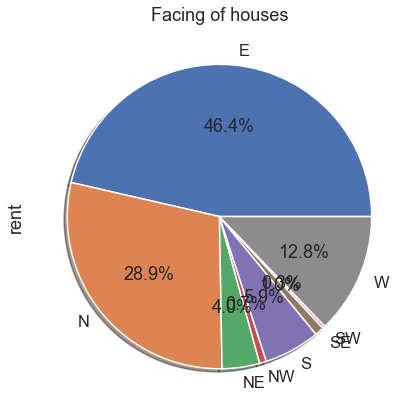

In [107]:
data.groupby('facing')["rent"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(7,7),title="Facing of houses")

<AxesSubplot:title={'center':'Water Supply of houses'}, ylabel='rent'>

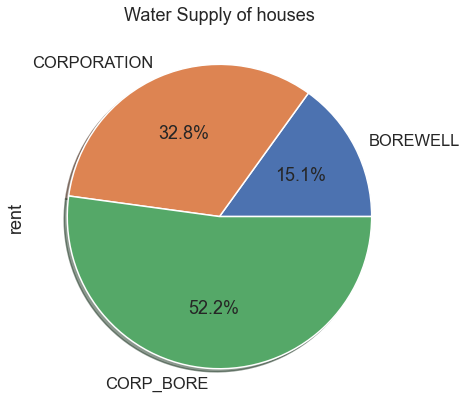

In [147]:
data.groupby('water_supply')["rent"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(7,7),title="Water Supply of houses")

<AxesSubplot:title={'center':'Building type of houses'}, ylabel='rent'>

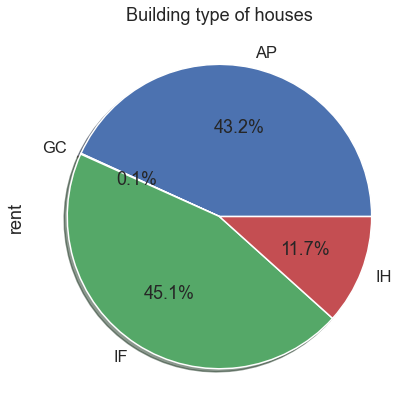

In [151]:
data.groupby('building_type')["rent"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(7,7),title="Building type of houses")

In [108]:
data['facing'].value_counts()

E     9514
N     5917
W     2628
S     1219
NE     817
SE     197
NW     149
SW      59
Name: facing, dtype: int64

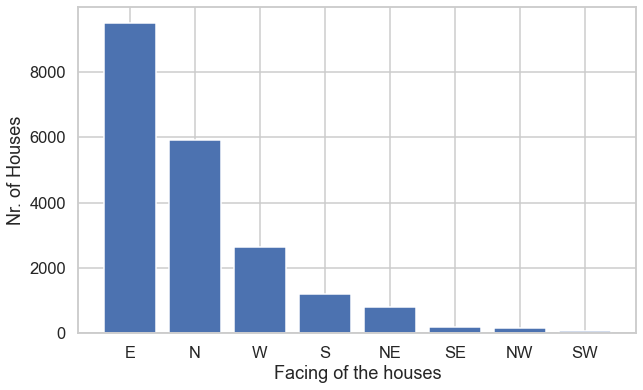

In [109]:
frequency = data['facing'].value_counts()
plt.figure(figsize=(10, 6))
plt.xlabel('Facing of the houses')
plt.ylabel('Nr. of Houses')
plt.bar(frequency.index, height=frequency)
plt.show()

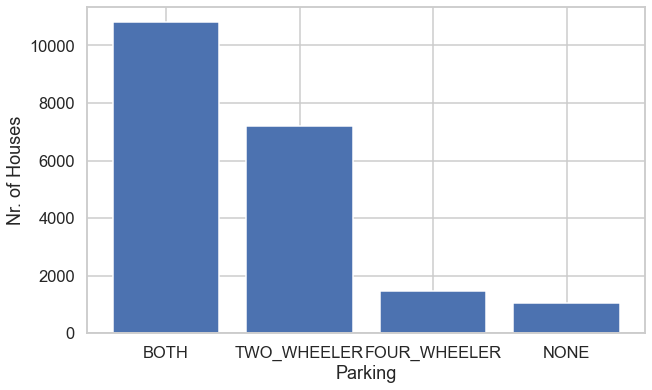

In [110]:
frequency1 = data['parking'].value_counts()
plt.figure(figsize=(10, 6))
plt.xlabel('Parking')
plt.ylabel('Nr. of Houses')
plt.bar(frequency1.index, height=frequency1)
plt.show()

## Descriptive Statistics

In [111]:
print(data['rent'].min())
print(data['rent'].max())

8000
50000


### Correlation

In [112]:
data.corr().head()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
latitude,1.000000,0.194742,0.035853,0.019632,0.034771,-0.009285,0.006797,0.030060,-0.007669,-0.003166,0.004313,-0.000597,0.049549,0.033130
longitude,0.194742,1.000000,0.245978,0.208302,0.229751,-0.024382,0.075645,-0.136155,0.095956,-0.004139,0.152689,0.201782,0.164898,0.163864
gym,0.035853,0.245978,1.000000,0.645255,0.769686,0.008972,0.290462,-0.179643,0.327032,-0.002625,0.392266,0.526721,0.415512,0.432081
lift,0.019632,0.208302,0.645255,1.000000,0.564949,0.011361,0.308248,-0.181409,0.366707,-0.003867,0.405142,0.530908,0.525769,0.462606
swimming_pool,0.034771,0.229751,0.769686,0.564949,1.000000,0.010066,0.284686,-0.167475,0.320946,-0.002198,0.434442,0.574944,0.383183,0.434776


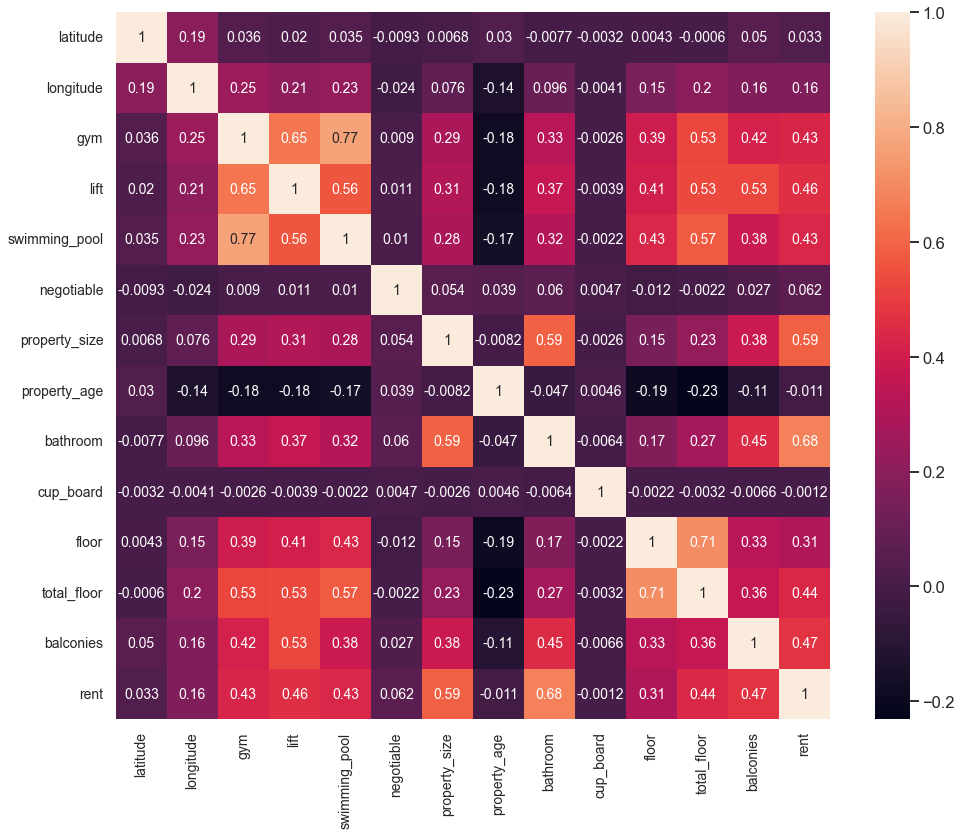

In [113]:
plt.figure(figsize=(16,13))
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

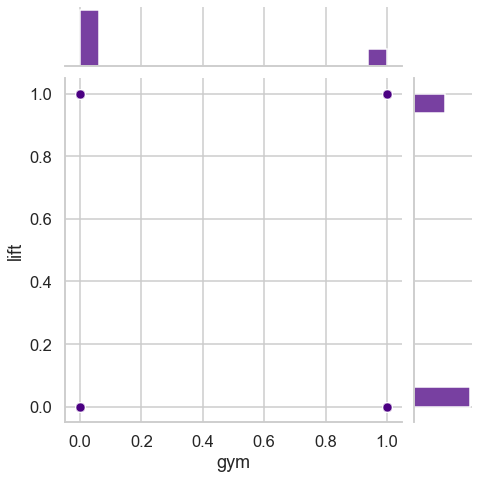

In [114]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['gym'], y=data['lift'], size=7, color='indigo', joint_kws={'alpha':0.5})
plt.show()

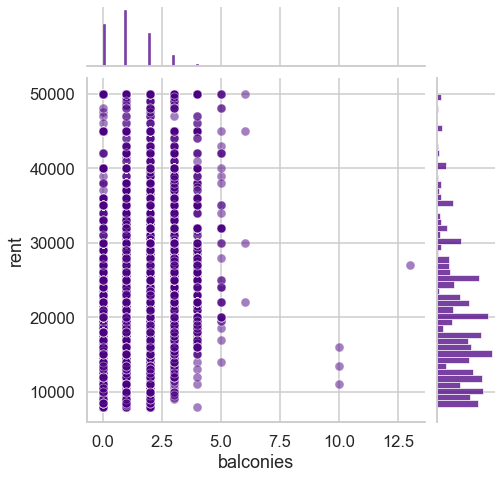

In [115]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['balconies'], y=data['rent'], size=7, color='indigo', joint_kws={'alpha':0.5})
plt.show()

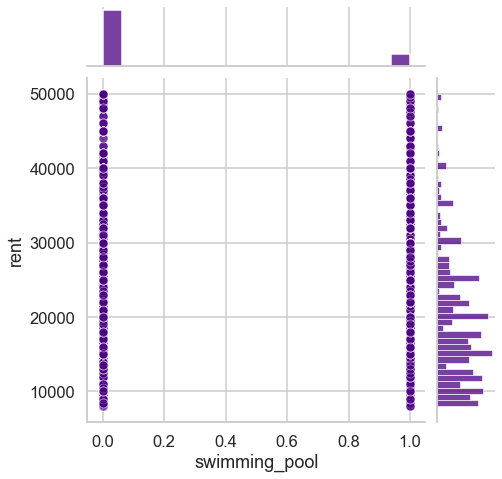

In [116]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['swimming_pool'], y=data['rent'], size=7, color='indigo', joint_kws={'alpha':0.5})
plt.show()

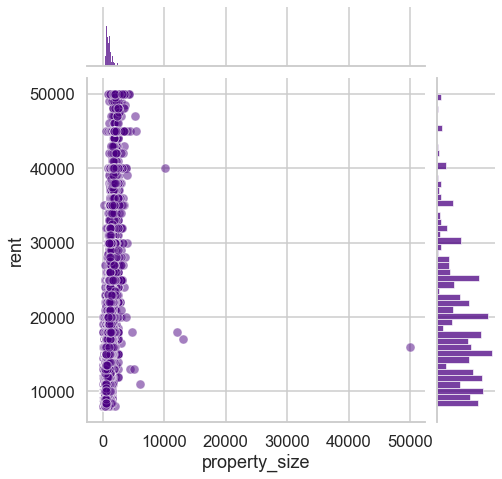

In [117]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['property_size'], y=data['rent'], size=7, color='indigo', joint_kws={'alpha':0.5})
plt.show()

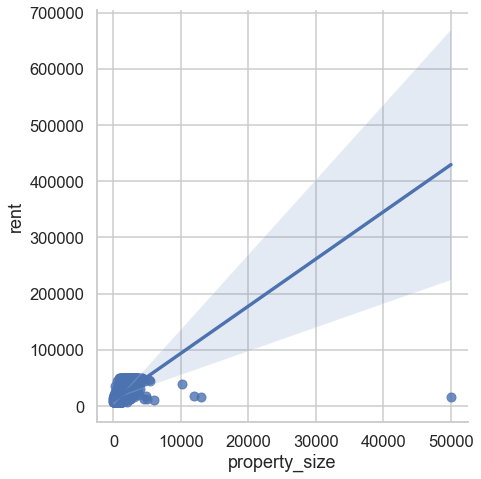

In [118]:
sns.lmplot(x='property_size', y='rent', data=data, size=7)
plt.show()

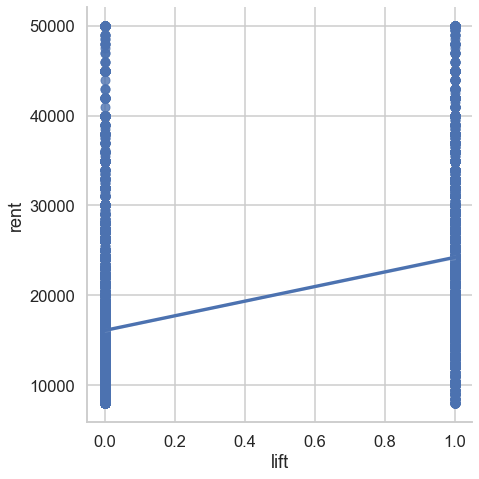

In [119]:
sns.lmplot(x='lift', y='rent', data=data, size=7)
plt.show()

It is visible from the correlation map that only the gym,lift,swimming pool,property_size,bathroom,floor,total floors and balconies columns have a visible impact in determining the rent of the property. 

In [136]:
    le = LabelEncoder()
    label = le.fit_transform(data['id'])
    data.drop('id', axis=1, inplace=True)
    data["id"] = label
    data = data.drop(['id'],axis=1)

KeyError: 'id'

In [135]:
data.head()

,type,activation_date,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,21-04-2018 14:44,77.634471,NaN,1,1,1,0,SEMI_FURNISHED,BOTH,...,2,E,2,6,12,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2,40000
1,BHK2,09-10-2017 12:48,77.672280,NaN,0,1,0,1,SEMI_FURNISHED,BOTH,...,2,NE,2,3,4,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2,22000
2,BHK3,12-06-2018 22:02,80.262012,NaN,0,1,0,0,SEMI_FURNISHED,BOTH,...,3,E,3,1,5,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3,28000
3,BHK1,20-07-2018 16:22,77.531634,NaN,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,...,1,E,1,1,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0,8000
4,BHK3,31-05-2018 17:41,77.649446,NaN,0,0,0,1,SEMI_FURNISHED,BOTH,...,3,E,4,0,0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1,45000


In [137]:
    label = le.fit_transform(data['longitude'])
    data.drop('longitude', axis=1, inplace=True)
    data["longitude"] = label
    data = data.drop(['longitude'],axis=1)

In [138]:
data.head()

,type,activation_date,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,21-04-2018 14:44,NaN,1,1,1,0,SEMI_FURNISHED,BOTH,1250,...,2,E,2,6,12,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2,40000
1,BHK2,09-10-2017 12:48,NaN,0,1,0,1,SEMI_FURNISHED,BOTH,1400,...,2,NE,2,3,4,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2,22000
2,BHK3,12-06-2018 22:02,NaN,0,1,0,0,SEMI_FURNISHED,BOTH,1350,...,3,E,3,1,5,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3,28000
3,BHK1,20-07-2018 16:22,NaN,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,...,1,E,1,1,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0,8000
4,BHK3,31-05-2018 17:41,NaN,0,0,0,1,SEMI_FURNISHED,BOTH,1500,...,3,E,4,0,0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1,45000


In [139]:
    label = le.fit_transform(data['activation_date'])
    data.drop('activation_date', axis=1, inplace=True)
    data["activation_date"] = label
    data = data.drop(['activation_date'],axis=1)

In [140]:
data.head()

,type,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,NaN,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25,2,E,2,6,12,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2,40000
1,BHK2,NaN,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4,2,NE,2,3,4,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2,22000
2,BHK3,NaN,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6,3,E,3,1,5,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3,28000
3,BHK1,NaN,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3,1,E,1,1,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0,8000
4,BHK3,NaN,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15,3,E,4,0,0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1,45000


In [141]:
    label = le.fit_transform(data['amenities'])
    data.drop('amenities', axis=1, inplace=True)
    data["amenities"] = label
    data = data.drop(['amenities'],axis=1)

In [142]:
data.head()

,type,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
0,BHK2,NaN,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25,2,E,2,6,12,CORP_BORE,AP,2,40000
1,BHK2,NaN,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4,2,NE,2,3,4,CORPORATION,AP,2,22000
2,BHK3,NaN,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6,3,E,3,1,5,CORP_BORE,AP,3,28000
3,BHK1,NaN,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3,1,E,1,1,2,CORPORATION,IH,0,8000
4,BHK3,NaN,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15,3,E,4,0,0,CORPORATION,IH,1,45000


In [158]:
data['type']=data['type'].map({'BHK1':1,'BHK2':2,'BHK3':3})
data.head()

,type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
0,NaN,1,1,1,0,1,1,1250,25,2,NaN,2,6,12,NaN,AP,2,40000
1,NaN,0,1,0,1,1,1,1400,4,2,NaN,2,3,4,NaN,AP,2,22000
2,NaN,0,1,0,0,1,1,1350,6,3,NaN,3,1,5,NaN,AP,3,28000
3,NaN,0,0,0,1,1,2,600,3,1,NaN,1,1,2,NaN,IH,0,8000
4,NaN,0,0,0,1,1,1,1500,15,3,NaN,4,0,0,NaN,IH,1,45000


In [159]:
data.rename(columns = {'type':'type_of_house'},inplace=True)

In [160]:
data.head()

,type_of_house,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
0,NaN,1,1,1,0,1,1,1250,25,2,NaN,2,6,12,NaN,AP,2,40000
1,NaN,0,1,0,1,1,1,1400,4,2,NaN,2,3,4,NaN,AP,2,22000
2,NaN,0,1,0,0,1,1,1350,6,3,NaN,3,1,5,NaN,AP,3,28000
3,NaN,0,0,0,1,1,2,600,3,1,NaN,1,1,2,NaN,IH,0,8000
4,NaN,0,0,0,1,1,1,1500,15,3,NaN,4,0,0,NaN,IH,1,45000
